In [79]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [80]:
# Load the dataset
df = pd.read_csv('../datasets/merged_player_data.csv')

In [81]:
# Get the player height, weight, position, rebounds, and assists, and drop all rows with a null value
query_df = df[['player_height', 'player_weight', 'POS', 'reb', 'ast']].dropna()

In [82]:
# Change the POS column to remove everything with a '-' and after
query_df['POS'] = query_df['POS'].str.split('-').str[0]

# Get the player height, weight, position, rebounds, and assists, and drop all rows with a null value
query_df = df[['player_height', 'player_weight', 'POS', 'reb', 'ast']].dropna()

# Display the first few rows
query_df.head(2)

,player_height,player_weight,POS,reb,ast
0,73.0,180.0,PG-SG,1.1,1.9
1,72.0,161.0,PG,2.6,5.3


In [83]:
# Change the POS column to remove everything with a '-' and after
query_df['POS'] = query_df['POS'].str.split('-').str[0]
# Get the number of rows and columns
print(query_df.shape)
# Get the list of player features
features = ['player_height', 'player_weight', 'reb', 'ast']
# Calculate the z-scores for the features
z_scores = zscore(query_df[features])
# Remove outliers with z-scores greater than 3
mask = (abs(z_scores) < 3).all(axis=1)
query_df = query_df[mask]
# Check the new number of rows and columns
print(query_df.shape)


(983, 5)
(947, 5)


In [84]:
# Standardize the features
X = query_df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = query_df['POS']

In [85]:
# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
query_df['cluster'] = clusters

In [88]:
# Silhouette score to evaluate the clustering
from sklearn.metrics import silhouette_score
# Calculate the silhouette score and print it
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.46


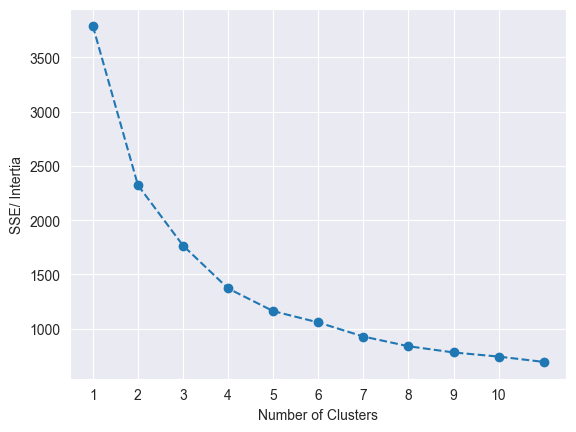

In [71]:
# Use the elbow method to find the optimal number of clusters
# CREDIT: Taken from Day 22 K-Means notebook
sse = []
# Look for the optimal number of clusters from 1 to 11
for k in range(1, 12):
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sse.append(km.inertia_)

# Plot the elbow curve to check for the optimal number of clusters
plt.plot(range(1, 12), sse, "o--")
plt.xticks(range(1, 11))
# Add plot
plt.xlabel("Number of Clusters")
plt.ylabel("SSE/ Intertia")
plt.show()

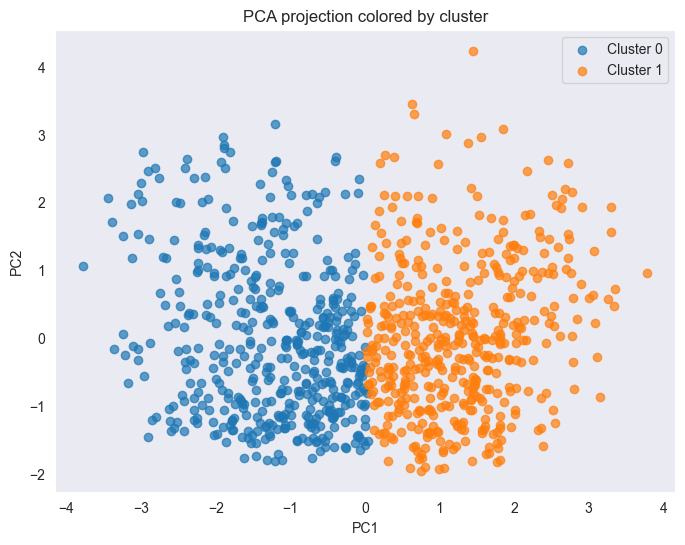

In [72]:
# Now, I will use PCA in order to graph and analyze the clusters
# PCA is needed because the data has 4 dimensions
# So, I couldn't graph it in 2D as Dr. Mallavarapu did in class
# CREDIT: Code knowledge and some snippets from course textbook
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# Fit PCA to the scaled data
pca = PCA(n_components=2)

# Transform the data
X_pca = pca.fit_transform(X_scaled)
labels = kmeans.fit_predict(X_scaled)
# Plot the PCA projection
plt.figure(figsize=(8,6))
for clust in np.unique(labels):
    # Set the mask up to label the clusters with colors
    mask = labels == clust
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=f"Cluster {clust}",
        alpha=0.7
    )
# Label the axes and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection colored by cluster')
plt.legend()
plt.grid()
plt.show()

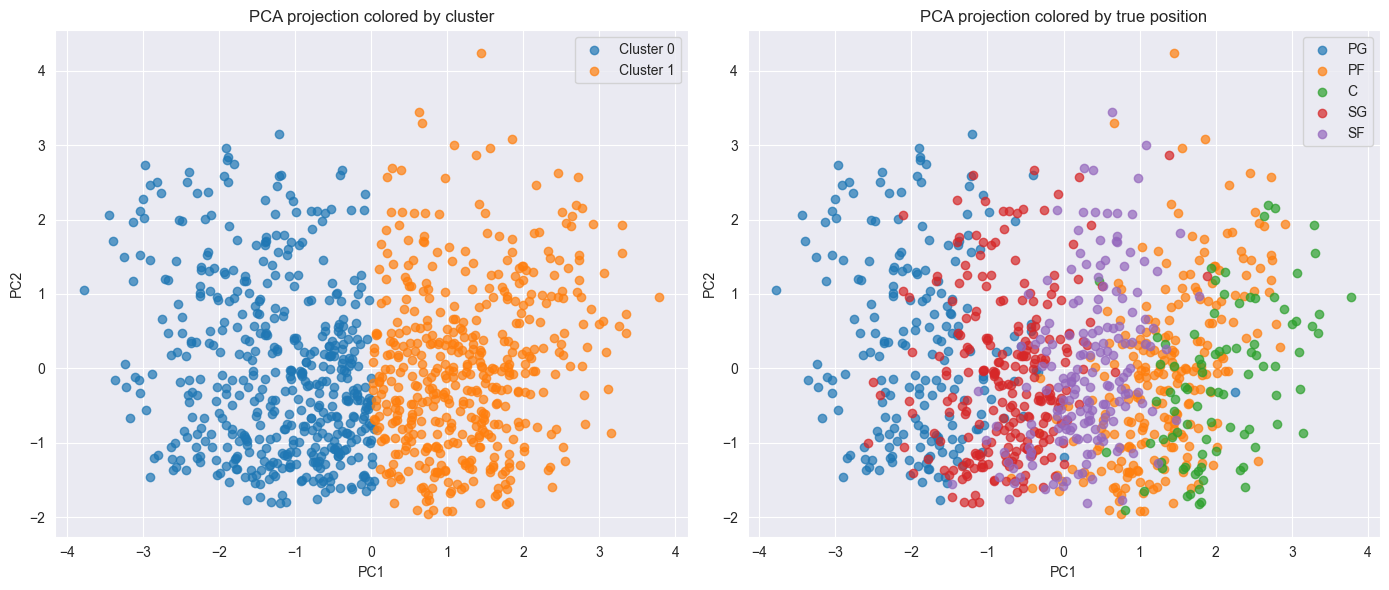

In [73]:
# CREDIT: Code knowledge and some snippets from course textbook
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
# Here, I want to see how the clusters relate to the true position

# Fit the pca and transform the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA projection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Now color by cluster as before
for clust in np.unique(labels):
    # Set the mask up to label the clusters with colors
    mask = labels == clust
    ax1.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=f"Cluster {clust}",
        alpha=0.7
    )
# Label the axes and title
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PCA projection colored by cluster')
ax1.legend()
ax1.grid(True)

# Now plot the same points
# But color by the POS column
for pos in query_df['POS'].unique():
    mask = (query_df['POS'] == pos)
    ax2.scatter(
        X_pca[mask, 0], X_pca[mask, 1],
        label=pos,
        alpha=0.7
    )
# Label the axes and title
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA projection colored by true position')
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()